In [132]:
import os, pickle, h5py
import numpy as np
import matplotlib.pyplot as plt

from hangul import style
from hangul.ml import normalized_acc_chance

In [133]:
imfs = ['i', 'm', 'f']
folds = np.arange(7)
cvs = np.arange(2)
layers = np.arange(7)
var_idxs = np.arange(9)
variables = np.array(['initial', 'medial', 'final',
             'initial_geometry', 'medial_geometry', 'final_geometry', 'all_geometry',
             'atom_bof', 'atom_mod_rotations_bof'])
nvar = np.array([19, 21, 29, 2, 5, 3, 30, 24, 16], dtype=float)

accuracies = np.full((len(imfs), folds.size, layers.size, variables.size), np.nan)
ratios = np.full((len(imfs), folds.size, layers.size, variables.size), np.nan)

In [179]:
folder = '/storage/hangul/uoi_hangul_save/'
exp_name = 'test'
seed = 109

for ii, imf in enumerate(imfs):
    for fold in folds:
        for layer in layers:
            for var_idx in var_idxs:
                var = variables[var_idx]
                cur_dir = '{}_{}_{}_{}'.format(exp_name, imf, fold, seed)
                fname = 'LR_UoI_{}_{}_{}_{}.pkl'.format(imf, fold, layer, var)
                fname = os.path.join(folder, cur_dir, fname)
                with h5py.File(os.path.join(folder, cur_dir, 'layer_reps.h5'), 'r') as f:
                    for key in f['test'].keys():
                        if int(key[0]) == layer:
                            dim = f['test'][key].shape[1]
                with open(fname, 'rb') as f:
                    acc, coef = pickle.load(f)
                chance_acc = acc[..., 2]
                acc = acc[..., 1]
                    
                accuracies[ii, fold, layer, var_idx] = normalized_acc_chance(acc, chance_acc).mean()
                print(imf, fold, layer, variables[var_idx])

                print(len(coef[0]), coef[0][0].shape)
                num = 0.
                for cv in cvs:
                    cv_coef = np.concatenate([c.ravel() for c in coef[cv]])
                    num += np.not_equal(cv_coef, 0.).sum()
                den = len(cvs) * nvar[var_idx]
                ratios[ii, fold, layer, var_idx] = float(num) / den

i 0 0 initial
1 (19, 1076)
i 0 0 medial
1 (21, 1076)
i 0 0 final
1 (28, 1076)
i 0 0 initial_geometry
1 (1, 1076)
i 0 0 medial_geometry
1 (5, 1076)
i 0 0 final_geometry
1 (3, 1076)
i 0 0 all_geometry
1 (30, 1076)
i 0 0 atom_bof
24 (1, 1076)
i 0 0 atom_mod_rotations_bof
16 (1, 1076)
i 0 1 initial
1 (19, 1076)
i 0 1 medial
1 (21, 1076)
i 0 1 final
1 (28, 1076)
i 0 1 initial_geometry
1 (1, 1076)
i 0 1 medial_geometry
1 (5, 1076)
i 0 1 final_geometry
1 (3, 1076)
i 0 1 all_geometry
1 (30, 1076)
i 0 1 atom_bof
24 (1, 1076)
i 0 1 atom_mod_rotations_bof
16 (1, 1076)
i 0 2 initial
1 (19, 1076)
i 0 2 medial
1 (21, 1076)
i 0 2 final
1 (28, 1076)
i 0 2 initial_geometry
1 (1, 1076)
i 0 2 medial_geometry
1 (5, 1076)
i 0 2 final_geometry
1 (3, 1076)
i 0 2 all_geometry
1 (30, 1076)
i 0 2 atom_bof
24 (1, 1076)
i 0 2 atom_mod_rotations_bof
16 (1, 1076)
i 0 3 initial
1 (19, 1075)
i 0 3 medial
1 (21, 1075)
i 0 3 final
1 (28, 1075)
i 0 3 initial_geometry
1 (1, 1075)
i 0 3 medial_geometry
1 (5, 1075)
i 0 3 f

m 1 0 medial
1 (21, 1096)
m 1 0 final
1 (28, 1096)
m 1 0 initial_geometry
1 (1, 1096)
m 1 0 medial_geometry
1 (5, 1096)
m 1 0 final_geometry
1 (3, 1096)
m 1 0 all_geometry
1 (30, 1096)
m 1 0 atom_bof
24 (1, 1096)
m 1 0 atom_mod_rotations_bof
16 (1, 1096)
m 1 1 initial
1 (19, 1096)
m 1 1 medial
1 (21, 1096)
m 1 1 final
1 (28, 1096)
m 1 1 initial_geometry
1 (1, 1096)
m 1 1 medial_geometry
1 (5, 1096)
m 1 1 final_geometry
1 (3, 1096)
m 1 1 all_geometry
1 (30, 1096)
m 1 1 atom_bof
24 (1, 1096)
m 1 1 atom_mod_rotations_bof
16 (1, 1096)
m 1 2 initial
1 (19, 1096)
m 1 2 medial
1 (21, 1096)
m 1 2 final
1 (28, 1096)
m 1 2 initial_geometry
1 (1, 1096)
m 1 2 medial_geometry
1 (5, 1096)
m 1 2 final_geometry
1 (3, 1096)
m 1 2 all_geometry
1 (30, 1096)
m 1 2 atom_bof
24 (1, 1096)
m 1 2 atom_mod_rotations_bof
16 (1, 1096)
m 1 3 initial
1 (19, 1095)
m 1 3 medial
1 (21, 1093)
m 1 3 final
1 (28, 1094)
m 1 3 initial_geometry
1 (1, 1094)
m 1 3 medial_geometry
1 (5, 1093)
m 1 3 final_geometry
1 (3, 1094)
m

f 2 1 final
1 (28, 1166)
f 2 1 initial_geometry
1 (1, 1166)
f 2 1 medial_geometry
1 (5, 1166)
f 2 1 final_geometry
1 (3, 1166)
f 2 1 all_geometry
1 (30, 1166)
f 2 1 atom_bof
24 (1, 1166)
f 2 1 atom_mod_rotations_bof
16 (1, 1166)
f 2 2 initial
1 (19, 1166)
f 2 2 medial
1 (21, 1166)
f 2 2 final
1 (28, 1166)
f 2 2 initial_geometry
1 (1, 1166)
f 2 2 medial_geometry
1 (5, 1166)
f 2 2 final_geometry
1 (3, 1166)
f 2 2 all_geometry
1 (30, 1166)
f 2 2 atom_bof
24 (1, 1166)
f 2 2 atom_mod_rotations_bof
16 (1, 1166)
f 2 3 initial
1 (19, 1166)
f 2 3 medial
1 (21, 1166)
f 2 3 final
1 (28, 1166)
f 2 3 initial_geometry
1 (1, 1166)
f 2 3 medial_geometry
1 (5, 1166)
f 2 3 final_geometry
1 (3, 1166)
f 2 3 all_geometry
1 (30, 1166)
f 2 3 atom_bof
24 (1, 1166)
f 2 3 atom_mod_rotations_bof
16 (1, 1165)
f 2 4 initial
1 (19, 1166)
f 2 4 medial
1 (21, 1166)
f 2 4 final
1 (28, 1166)
f 2 4 initial_geometry
1 (1, 1166)
f 2 4 medial_geometry
1 (5, 1166)
f 2 4 final_geometry
1 (3, 1166)
f 2 4 all_geometry
1 (30, 1

In [183]:
exp_names = {'i': (5, 48656),
             'm': (5, 15285),
             'f': (5, 46148),
             'imf': (5, 46119),
             'trav': (6, 3868),
             'vae': (2300, 4)}
exp_names = {'imf': (5, 46119),
             'trav2': (26, 120001),
             'vae': (2300, 4),
             'nvae': (2500, 10005)}
models = np.array(list(exp_names.keys()))
model_names = [r'Init. $\beta$', r'Med. $\beta$', r'Fin. $\beta$', r'IMF $\beta$',
               r'Trav. $\beta$', r'$\beta$']
model_names = [r'CV $\beta$-VAE$_{\gamma>1}$', r'CV $\beta$-VAE$_{\gamma<1}$',
               r'Trav. $\beta$-VAE', 'CV VAE']
vae_accuracies = np.full((models.size, folds.size, variables.size), np.nan)
vae_ratios = np.full((models.size, folds.size, variables.size), np.nan)

In [184]:
folder = '/storage/hangul/bvae/'
for exp_idx, (exp_name, (numi, exp_num)) in enumerate(exp_names.items()):
    for fold in folds:
        subfolder = '{}_{}_{}'.format(numi, fold, exp_num)
        for var_idx in var_idxs:
            var = variables[var_idx]
            fname = 'LR_UoI_{}_{}_{}.pkl'.format(exp_name, fold, var)
            fname = os.path.join(folder, subfolder, fname)
            with h5py.File(os.path.join(folder, subfolder, 'layer_reps.h5'), 'r') as f:
                dim = f['test/encoding'].shape[1]
            with open(fname, 'rb') as f:
                acc, coef = pickle.load(f)
            chance_acc = acc[..., 2]
            acc = acc[..., 1]

            vae_accuracies[exp_idx, fold, var_idx] = normalized_acc_chance(acc, chance_acc).mean()
            print(fold, exp_name, variables[var_idx])

            print(len(coef[0]), coef[0][0].shape)
            num = 0.
            for cv in cvs:
                cv_coef = np.concatenate([c.ravel() for c in coef[cv]])
                num += np.not_equal(cv_coef, 0.).sum()
            den = len(cvs) * nvar[var_idx]
            vae_ratios[exp_idx, fold, var_idx] = float(num) / den

0 imf initial
1 (19, 136)
0 imf medial
1 (21, 136)
0 imf final
1 (28, 136)
0 imf initial_geometry
1 (1, 136)
0 imf medial_geometry
1 (5, 136)
0 imf final_geometry
1 (3, 136)
0 imf all_geometry
1 (30, 136)
0 imf atom_bof
24 (1, 136)
0 imf atom_mod_rotations_bof
16 (1, 136)
1 imf initial
1 (19, 136)
1 imf medial
1 (21, 136)
1 imf final
1 (28, 136)
1 imf initial_geometry
1 (1, 136)
1 imf medial_geometry
1 (5, 136)
1 imf final_geometry
1 (3, 136)
1 imf all_geometry
1 (30, 136)
1 imf atom_bof
24 (1, 136)
1 imf atom_mod_rotations_bof
16 (1, 136)
2 imf initial
1 (19, 136)
2 imf medial
1 (21, 136)
2 imf final
1 (28, 136)
2 imf initial_geometry
1 (1, 136)
2 imf medial_geometry
1 (5, 136)
2 imf final_geometry
1 (3, 136)
2 imf all_geometry
1 (30, 136)
2 imf atom_bof
24 (1, 136)
2 imf atom_mod_rotations_bof
16 (1, 136)
3 imf initial
1 (19, 136)
3 imf medial
1 (21, 136)
3 imf final
1 (28, 136)
3 imf initial_geometry
1 (1, 136)
3 imf medial_geometry
1 (5, 136)
3 imf final_geometry
1 (3, 136)
3 imf a

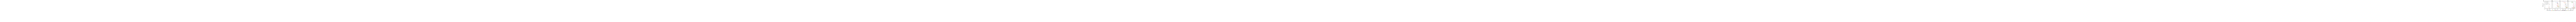

In [198]:
le = .0625
re = .0025
te = .05
be = .25
hg = .029
h = 1. - te - be
w = (1. - le - re - 3 * hg) / 4

fig = plt.figure(figsize=(5.5, 1.75))
axes = []
for ii in range(4):
    axes.append(fig.add_axes([le + ii * (w + hg), be, w, h]))

variable_names = np.array(['Init.', 'Med.', 'Fin.',
             'Init. geo.', 'Med geo.', 'Fin. geo.', 'All geo.',
             'BoA', 'BoA % rot.'])
layer_names = [r'L$_0$', r'R$_0$', r'L$_1$', r'R$_1$', r'L$_2$', r'R$_2$', 'L$_3$']

for ii, ax in enumerate(axes[1:]):
    ximf = np.nanmean(ratios[ii], axis=0)
    yimf = np.nanmean(accuracies[ii], axis=0)
    for var_idx in var_idxs:
        x = ximf[:, var_idx]
        y = yimf[:, var_idx]
        for layer in layers:
            if layer == 6:
                label = variable_names[var_idx]
            else:
                label = None
            c = 'C{}'.format(var_idx)
            ax.scatter(x[layer] - 100, y[layer] - 100, c=c, alpha=.7,
                      s=2+3*layer, label=label)
            ax.annotate(layer_names[layer], (x[layer], y[layer]), color=c,
                       annotation_clip=True, fontsize=6)
    print()

ax = axes[0]
ms = ['>', '<', '*', '.']
for exp_idx, (exp_name, (numi, exp_num)) in enumerate(exp_names.items()):
    ximf = np.nanmean(vae_ratios[exp_idx], axis=0)
    yimf = np.nanmean(vae_accuracies[exp_idx], axis=0)
    for var_idx in var_idxs:
        x = ximf[var_idx]
        y = yimf[var_idx]
        m = ms[exp_idx]
        if var_idx == 0:
            label = model_names[exp_idx]
        else:
            label = None
        ax.scatter(x, y, c='C{}'.format(var_idx), alpha=.7,
                   marker=m, s=10, linewidth=.2)
        ax.scatter(x-100, y-1000, c='k', alpha=.7,
                   marker=m, label=label, s=10, linewidth=.2)

axes[0].set_yticklabels([0, .5, 1])
axes[0].set_ylabel('Norm. acc.', fontsize=style.axis_label_fontsize, labelpad=0)
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[3].set_yticklabels([])
axes[1].legend(loc='upper left', fontsize=style.ticklabel_fontsize-1, ncol=9,
              labelspacing=.1, handletextpad=.1, columnspacing=.1,
              bbox_to_anchor=(-.5, -.21))
axes[0].legend(loc='upper left', fontsize=style.ticklabel_fontsize-1, ncol=1,
              labelspacing=.1, handletextpad=.1, columnspacing=.1,
              bbox_to_anchor=(-.01, 1))

for ax in axes:
    ax.tick_params(labelsize=style.ticklabel_fontsize)
    ax.set_yticks([0, .5, 1])
    ax.set_xticks([1e0, 1e1, 1e2])
    ax.set_xlim(1e0, 5e2)
    ax.set_ylim(-.05, 1.05)
    ax.set_xscale('log')
    ax.set_xlabel('Feats./dim', fontsize=style.axis_label_fontsize, labelpad=0)

y = .94
fig.text(.015, y, 'A', **style.panel_letter_fontstyle)
fig.text(.275, y, 'B', **style.panel_letter_fontstyle)
fig.text(.5175, y, 'C', **style.panel_letter_fontstyle)
fig.text(.76, y, 'D', **style.panel_letter_fontstyle)
plt.savefig('hangul_uoi_lr.png', dpi=300)
plt.savefig('hangul_uoi_lr.pdf', dpi=300)